# Predicting Diabetes

## Import the basic libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Load and Review the data


In [9]:
df = pd.read_csv("C:\\Users\\Acer\\Desktop\\pima-indian-data.csv")
df.shape
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant                                                    768 non-null int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    768 non-null int64
Diastolic blood pressure (mm Hg)                                            768 non-null int64
Triceps skin fold thickness (mm)                                            768 non-null int64
Triceps skin fold thickness (mm).1                                          768 non-null int64
Body mass index (weight in kg/(height in m)^2)                              768 non-null float64
Diabetes pedigree function                                                  768 non-null float64
Age (years)                                                                 768 non-null int64
Class variable (0 or 1)                                                     768 non-null int64
dtypes: float64(2), int64(7)
memory u

In [11]:
df.head(5)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),Triceps skin fold thickness (mm).1,Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.isnull().values.any()

False

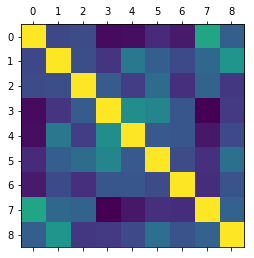

In [28]:
plt.matshow(df.corr())

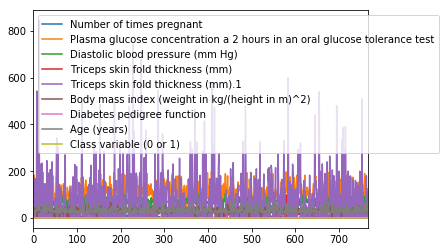

In [29]:
df.plot()
plt.show()

In [32]:
df.head(5)


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),Triceps skin fold thickness (mm).1,Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
boolean_map = {1: True, 0: False}
df['Class variable (0 or 1)'] = df['Class variable (0 or 1)'].map(boolean_map)
df.head(5)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),Triceps skin fold thickness (mm).1,Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [37]:
reverse_booltomap = {True: 1, False: 0}
df['Class variable (0 or 1)'] = df['Class variable (0 or 1)'].map(reverse_booltomap)
df.head(5)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),Triceps skin fold thickness (mm).1,Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Finding the number of True and False totals

In [44]:
total_trues = len(df[df['Class variable (0 or 1)'] == 1])
total_false = len(df[df['Class variable (0 or 1)'] == 0])
print ("Total Trues are : " + str(total_trues))
print ("Total Falses are : " + str(total_false))

Total Trues are : 268
Total Falses are : 500


## FInding the percentage of total trues and false

In [48]:
per_of_trues = (total_trues / (len(df))) * 100
per_of_falses = (total_false / (len(df))) * 100
print("Percentage of total Trues is %s." %(per_of_trues))
print("Percentage of total Falses is %s." %(per_of_falses))

Percentage of total Trues is 34.89583333333333.
Percentage of total Falses is 65.10416666666666.


## Adding a new column

In [51]:
df['newcol'] = df['Age (years)'] * 2
df.head(5)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),Triceps skin fold thickness (mm).1,Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1),newcol
0,6,148,72,35,0,33.6,0.627,50,1,100
1,1,85,66,29,0,26.6,0.351,31,0,62
2,8,183,64,0,0,23.3,0.672,32,1,64
3,1,89,66,23,94,28.1,0.167,21,0,42
4,0,137,40,35,168,43.1,2.288,33,1,66


## Deleting a column

In [54]:
del df['newcol']
df.head(5)

KeyError: 'newcol'

In [56]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),Triceps skin fold thickness (mm).1,Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
col_names = [df.columns]
print(col_names)
del col_names[-1]
print(col_names)

[Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       'Triceps skin fold thickness (mm).1',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)'],
      dtype='object')]
[]


In [70]:
col_names = [df.columns]
feature_col_names = list(col_names)
print(feature_col_names)
print(type(feature_col_names))
del feature_col_names[-1]
print(feature_col_names)

[Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       'Triceps skin fold thickness (mm).1',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)'],
      dtype='object')]
<class 'list'>
[]


In [75]:
df.head()
df.index

RangeIndex(start=0, stop=768, step=1)

In [76]:
from sklearn.cross_validation import train_test_split
col_names = ['Number of times pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       'Triceps skin fold thickness (mm).1',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)']
class_name = ['Class variable (0 or 1)']

### Dividing the data into training and testing sets

In [90]:
x = df[col_names].values
y = df[class_name].values
split_score = 0.30
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = split_score, random_state = 77)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

### Verify if the percentage of Trues and Falses in training and test dataset are same

In [93]:
trues = (len(df[df['Class variable (0 or 1)'] == 1]) / (len(df['Class variable (0 or 1)']))) * 100
print(trues)
falses = (len(df[df['Class variable (0 or 1)'] == 0]) / (len(df['Class variable (0 or 1)']))) * 100
print(falses)
train_trues = (len(y_train[y_train[:] == 1]) / (len(y_train[:]))) * 100
print(train_trues)
train_falses = (len(y_train[y_train[:] == 0]) / (len(y_train[:]))) * 100
print(train_falses)
test_trues = (len(y_test[y_test[:] == 1]) / (len(y_test[:]))) * 100
print(test_trues)
test_falses = (len(y_test[y_test[:] == 0]) / (len(y_test[:]))) * 100
print(test_falses)
#print("Percentage of actual trues is " + str(trues) + " and actual falses is " + str(falses) + "\nPercentage of Predicted trues is " + str(train_trues) + " and predicted falses is " + str(train_falses))

34.89583333333333
65.10416666666666
36.312849162011176
63.687150837988824
31.601731601731604
68.3982683982684


In [114]:
df.head()
len(df.loc[df['Number of times pregnant'] == 0,:])

111